# Обработка изображений - свёрточные нейросети

## Полносвязная сеть
<img src="images/mnist_fc.png" width=60% height=60%>
Количество весов входного слоя = высота * ширина * каналы * количество нейронов скрытого слоя

```
MNIST = 28*28*1*10 = 7840
```

## Хьюбел "Глаз, мозг, зрение"
```
https://djvu.online/file/4xcWNws1Sw3DO
David H. Hubel
The Nobel Prize in Physiology or Medicine 1981
```

**Рецептивное поле клетки:**
<img src="images/on_off_centers.png" width=80% height=80%>
<img src="images/ganglion cell responses.png" width=80% height=80%>

**Чувствительность к ориентации:**
<img src="images/orientation sensitivity.png" width=80% height=80%>

**Объединение рецептивных полей клеток:**
<img src="images/cell connection.png" width=80% height=80%>

## Свёртка

<img src="images/convolution.jpeg" width=60% height=60%>

$$
C_{i,j} = \sum_{u=0}^{m_x-1} \sum_{v=0}^{m_y-1} A_{i+u, j+v} B_{u,v} 
$$

```python
# conv implementation
def matrix_conv(mx1, mx2, m, n, mx_res):
    ''' x = m1 - m2 + 1; y = n1 - n2 + 1'''
    if m < 0 or n < 0:
        return False
    for i in range(0, m):
        for j in range(0, n):
            for u in range(0, len(mx2[0])):
                for v in range(0, len(mx2)):
                    mx_res[i][j] += (mx1[i + u][j + u] * mx2[u][v])
    return True
```

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(400, 640)


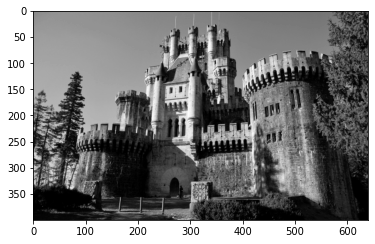

In [2]:
# Прочитаем изображение в режиме Grayscale
img_gray = cv2.imread('data/test.jpg', 0)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')
plt.show()

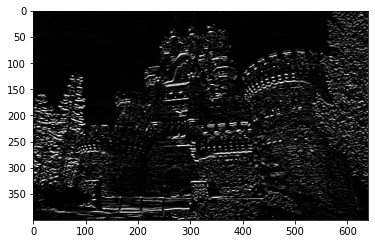

In [3]:
# фильтр Собеля вертикальный
kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1],
])
img_out = cv2.filter2D(img_gray, -1, kernel)
plt.imshow(img_out, cmap='gray')
plt.show()